# Feature Engineering 

In [1]:
import pandas as pd
df = pd.read_csv('Dataset .csv')

## Extract additional features

### Length of restaurant name and address

In [2]:
# Length of restaurant name
df['Restaurant Name Length'] = df['Restaurant Name'].apply(lambda x: len(str(x)))

# Length of address
df['Address Length'] = df['Address'].apply(lambda x: len(str(x)))

print("\nSample of new length features:")
display(df[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']].head())



Sample of new length features:


,Restaurant Name,Restaurant Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64


## Convert 'Yes'/'No' to 1/0 before analysis

In [3]:
yes_no_cols = ['Has Table booking', 'Has Online delivery', 
               'Is delivering now', 'Switch to order menu']

for col in yes_no_cols:
    df[col + ' (encoded)'] = df[col].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

## Check the new features

In [4]:
print("\nNewly engineered features:")

# Select only the newly engineered feature columns and display first 5 rows
feature_columns = ['Restaurant Name Length', 
                  'Address Length', 
                  'Has Table booking (encoded)', 
                  'Has Online delivery (encoded)']

# Display the DataFrame with these columns
display(df[feature_columns].head())


Newly engineered features:


,Restaurant Name Length,Address Length,Has Table booking (encoded),Has Online delivery (encoded)
0,16,71,1,0
1,16,67,1,0
2,22,56,1,0
3,4,70,0,0
4,11,64,1,0


## Visualization for Distribution of Restaurant Name Length

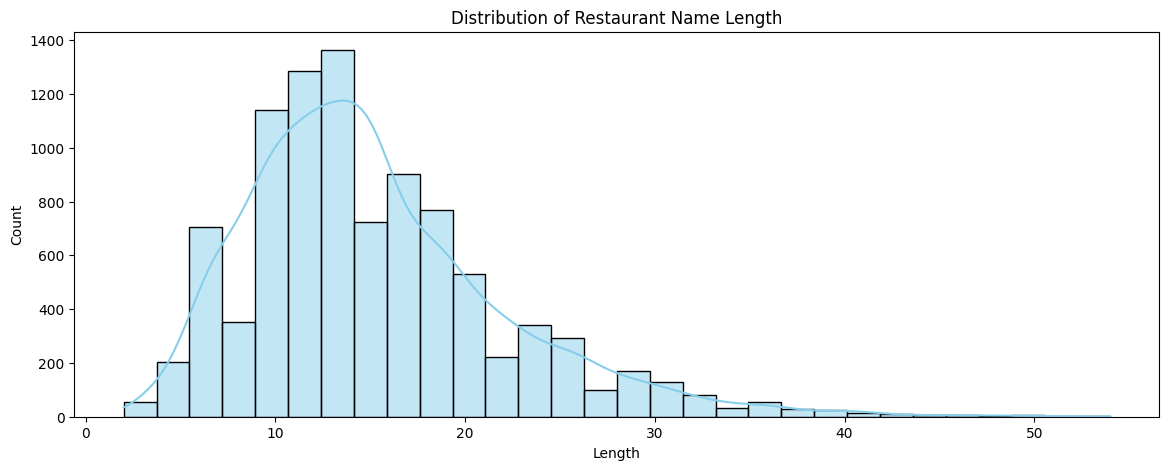

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,5))
sns.histplot(df['Restaurant Name Length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Name Length')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

## Visualization for Distribution of Address Length

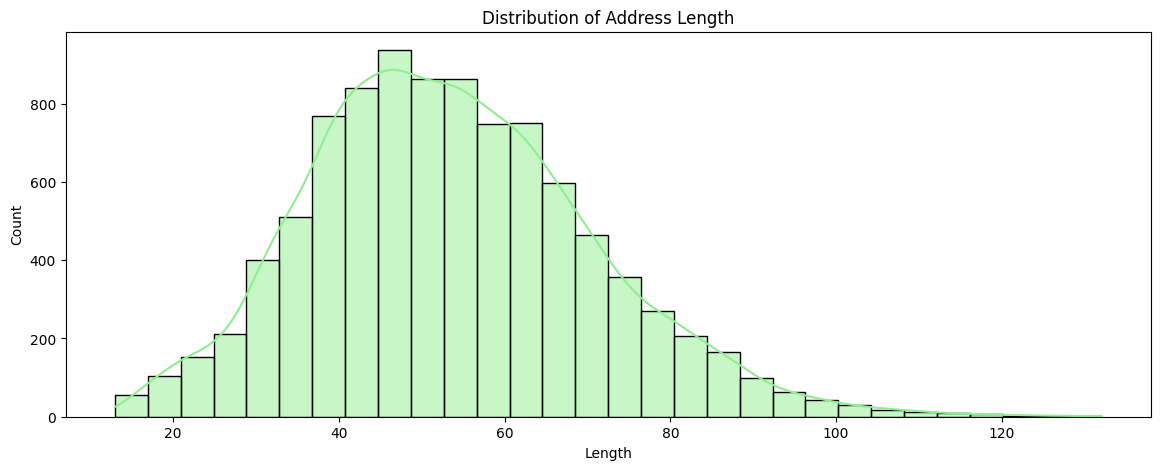

In [6]:
plt.figure(figsize=(14,5))
sns.histplot(df['Address Length'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Address Length')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()